# Common and Individual Basis Analysis (CIFA): demo

#### pyCIFA: python 2.7 version of original matlab code

In [1]:
import matplotlib.pyplot as plt
try:
    import pycifa
except:
    import sys
    sys.path.append('../demo/')

from classify import demo_classify
from face_clustering import demo_faceClustering
from linked_bss import demo_LinkedBSS
from cobe_cca_pls_pca import demo_cobe_cca_pls_pca
from heart import demo_heart
from pcobe import demo_pcobe

_DIRNAME_DATA = '../data/'

## Classification demo

### Dataset: YaleB
    http://vision.ucsd.edu/~iskwak/ExtYaleDatabase/ExtYaleB.html
    Saved as matlab *.mat file.

### About experiment
    Standard train-validate paradigm for supervised learning

### Parameters
#### filename (string)
    name of file with dataset saved as matlab *.mat file
#### dirname (string)
    name of directory where dataset is storing
#### mcRun (integer)
    number of Monte-Carlo runs; default: 50
#### minTrainRatio (float, value range: (0, 1) )
    Minimal fraction for training samples
    Default: 0.2
#### maxTrainRatio (float, value range: (0, 1) )
    Maximal fraction for training samples
    Default: 0.6
#### stepTrainRatio (float, value range: (0, 1) )
    Gap between train ratios
    Default: 0.1
#### verbose (boolean)
    Print messages or not
    Deafault: False
#### datfname (string / None)
    datfname = None: do not save array with results
    datfname = filename: save array with results as numpy npz file
#### imfname (string / None)
    imfname = None: show plot
    imfname = filename: save plot

### Warning:
    In original matlab code "correlation" metric (1-corr(x,y)) is used for KNN classifier,
    but we changed it to usual euclidean distance (because it has similar perfomance, but faster)

/home/pavel/apd/lib/python2.7/site-packages/sklearn/discriminant_analysis.py:455: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)


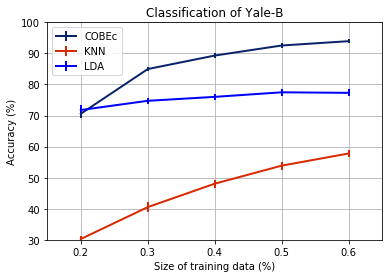

In [2]:
demo_classify(
    filename='YaleB_32x32.mat',
    dirname=_DIRNAME_DATA,
    mcRun=20,
    minTrainRatio=0.2,
    maxTrainRatio=0.6,
    stepTrainRatio=0.1,
    verbose=False,
    datfname=None, #'cobe_classify',
    imfname=None #'cobe_classify.pdf'
)

## Canonical Correlation with COBE, PLS, PCA Demo

### Dataset: artificial
#### Signals:

$$\begin{array}{c} 
 s_1^{(1)}(t_n) = \sin(0.01 \cdot t_n)\\ % problem with first litera
 s_1^{(2)}(t_n) = sign\big[ \sin(0.01 \cdot t_n) \big] \\
 s_i^{(l)}(t_n) \sim \mathcal{N}(0, 1), \quad i=\overline{2, r_I+1}, \, l=\{1, 2\} \\
 t_n = \{1, 2, \ldots, T\} \\
\end{array}$$

#### Source matrices:

$$\begin{array}{c}
 S_1 = \begin{bmatrix} % problem with first litera
  s_1^{(1)} & \ldots & s_{r_I+1}^{(1)} 
 \end{bmatrix}\\
 S_2 = \begin{bmatrix}
  s_1^{(2)} & \ldots & s_{r_I+1}^{(2)} 
 \end{bmatrix}\\
\end{array}$$

#### Mixing matrices:

$$\begin{array}{c}
 A_1, A_2 = ({r_I+1}) \times ({r_I+1}) \, \text{matrix}\\
 A_1[i, j], A_2[i, j] \sim \mathcal{N}(0,1) \\
 i,j=\overline{1, r_I+1}
\end{array}$$

#### Data:

$$\begin{array}{c}
 Y_1 = S_1 A_1 \\
 Y_2 = S_2 A_2 \\
\end{array}$$

### About experiment
    1) Mixed signals are input for COBE and CCA. Upper part of Figure 1
    contains common component extracted by COBE algorithm and recovered signals.
    The second part of plot displays signals recovered by CCA.
    
    2) Mixed signals are input for PLS-regression and COBE. Figure 2 shows
    comparison of PLS scores and COBE common component.

    3) Mixed signals are input for different algorithms of common feature extraction:
    COBE, PCA, JIVE. Comparative plot of the first component placed at figure 3.
    
### Parameters:
#### rC (integer)
    number of common components.
    Default: 1.
#### rI (integer)
    number of individual components per dataset
    Default: 9
#### T (integer)
    number of timepoints.
    Default: 1000
#### datfname (string / None)
    datfname = None: do not save array with results
    datfname = filename: save array with results as numpy npz file
#### imfname (string / None)
    imfname = None: show plot
    imfname = filename: save plot

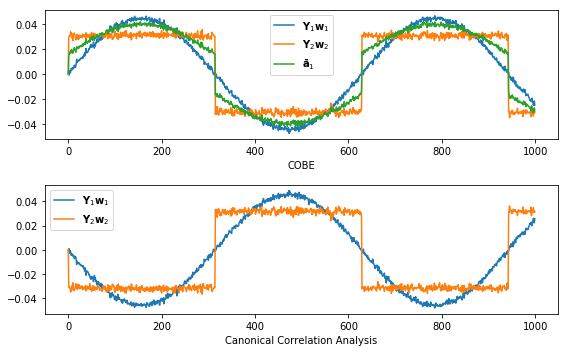

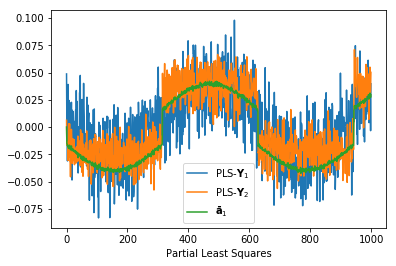

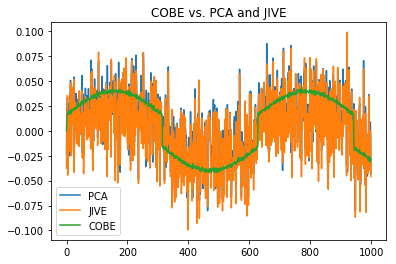

In [2]:
demo_cobe_cca_pls_pca(
    rC=1,
    rI=9,
    T=1000,
    datfname=None, #'demo_cobe_cca_pls_pca.npz',
    imfname=None #'demo_cobe_cca_pls_pca.pdf'
)

## Face clustering demo

### Datasets

#### ORL
    http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html
#### PIE
    http://www.cs.cmu.edu/afs/cs/project/PIE/MultiPie/Multi-Pie/Home.html (Multi-PIE)
#### Yale-B

    All datasets come as *.mat files.

### About experiment
Monte-Carlo runs with unsupervised learning of clusters

* COBE + TSNE
    * Common basis extraction
    * Subtracting common basis, obtaining individual
    * TSNE on individual (2)
    * K-means clustering  
* TSNE
    * Direct TSNE
    * K-means clustering
* PCA
    * Direct PCA on stacked data (up to 50 components)
    * K-means clustering
    
* GNMF [not supported yet]
    * GNMF on stacked data
    * K-means clustering
* MMC [not supported yet]

Metrics: mean accuracy, mutual information

### Parameters

#### db ('YALE', 'PIE', 'ORL')
    Name of database to be analyzed.
    Default: ORL
#### dirname (string)
    Name of directory with datasets
#### mcRun (integer)
    Number of Monte-Carlo runs
    Default: 5
#### cN (integer)
    Number of common components for COBE
    Default: 2
#### verbose (boolean)
    Print messages or not
    Default: False
    
### Warning:
    Something strange with accuracy: 100% for all algorithms.
    Possible reason: experiment without data separation on training and validation parts.

In [1]:
import matplotlib.pyplot as plt
try:
    import pycifa
except:
    import sys
    sys.path.append('../demo/')

from classify import demo_classify
from face_clustering import demo_faceClustering
from linked_bss import demo_LinkedBSS
from cobe_cca_pls_pca import demo_cobe_cca_pls_pca
from heart import demo_heart
from pcobe import demo_pcobe

_DIRNAME_DATA = '../data/'

In [2]:
demo_faceClustering(
    db='YALE',
    dirname=_DIRNAME_DATA,
    mcRun=1,
    cN=2,
    verbose=True
)

n=11  run=1 ...



/home/pavel/apd/lib/python2.7/site-packages/numpy/lib/shape_base.py:422: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  sub_arys.append(_nx.swapaxes(sary[st:end], axis, 0))


n=12  run=1 ...

n=13  run=1 ...

n=14  run=1 ...

n=15  run=1 ...

    ==== Averaged Accuracy ====
COBE    tSNE      PCA      GNMF      MMC
[[ 57.72005772  23.95382395  55.26695527  50.07215007  14.57431457]
 [ 50.52083333  22.78645833  55.98958333  59.765625    13.54166667]
 [ 52.75397797  22.88861689  41.98286414  45.53243574  13.46389229]
 [ 45.89371981  19.56521739  50.48309179  53.50241546  12.80193237]
 [ 54.12946429  21.31696429  60.15625     51.45089286  11.94196429]]


    ==== Averaged MutualInfo ====
COBE    tSNE      PCA      GNMF      MMC
[[ 0.55075329  0.17604926  0.47852877  0.49024271  0.02929472]
 [ 0.51312501  0.19050973  0.47972954  0.52475563  0.02956006]
 [ 0.53812176  0.20483381  0.39357209  0.44493273  0.03686888]
 [ 0.53492553  0.1410535   0.46628657  0.47521393  0.0386865 ]
 [ 0.49959419  0.21605472  0.50539302  0.49887724  0.03459466]]


## X-ray images of heart: mixing and COBE reconstruction (with non-negative feature extraction)

### Dataset
    heart.mat contains two vectorized gray-scaled x-ray images of chest. Each dataset contains mix of it and
    individual random i.i.d. vectors from standart normal distribution; elements of mixing matrix are also from
    standart normal distribution.

### About experiment
* Common feature extraction via COBE
* Non-negative common feature extraction (CNFE) from extracted common basis and loadings

### Parameters
#### filename (string)
    name of file with dataset saved as matlab *.mat file
#### dirname (string)
    name of directory where dataset is storing
#### N (integer)
    Number of datasets
    Default: 4
#### rC (integer)
    Number of common components
    Default: 2
#### rI (integer)
    Number of individual components
    Default: 8
#### nMix (integer)
    Number of channels (samples) in dataset (after mixing)
    Default: 20
#### origShape (tuple / list / None)
    Shape of each original image. If None, it is assumed that image is square.
    Default: [164, 164]
#### datfname (string / None)
    datfname = None: do not save array with results
    datfname = filename: save array with results as numpy npz file
#### imfname (string / None)
    imfname = None: show plot
    imfname = filename: save plot

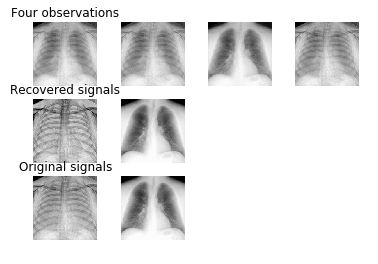

In [3]:
demo_heart(
    filename='heart.mat',
    dirname=_DIRNAME_DATA,
    N=4,
    rC=2,
    rI=8,
    nMix=20,
    origShape=[164, 164],
    datfname=None, #'demo_heart',
    imfname=None #'demo_heart.pdf'
)

## Linked BSS and COBE demo

### Warning:
    At the moment there are several problems with JBSS / MCCA

Run [1/20] ...
JIVE is running ...
COBE is running ...
COBEc is running ...
JBSS is running ...
JBSS Without SOBI:  [-3.00540351 -2.99909813 -2.99298541 -2.98530288]
JBSS With SOBI:  [-2.99448263 -2.99129576 -2.97782322 -2.97576822]
Run [2/20] ...
JIVE is running ...
COBE is running ...
COBEc is running ...
JBSS is running ...
JBSS Without SOBI:  [-3.00683591 -3.00271469 -2.99658237 -2.98210804]
JBSS With SOBI:  [-2.99345933 -2.99168128 -2.98053305 -2.97524388]
Run [3/20] ...
JIVE is running ...
COBE is running ...
COBEc is running ...
JBSS is running ...
JBSS Without SOBI:  [-3.00660413 -3.00209481 -2.99437517 -2.98732431]
JBSS With SOBI:  [-2.99145724 -2.99125196 -2.98856888 -2.9822957 ]
Run [4/20] ...
JIVE is running ...
COBE is running ...
COBEc is running ...
JBSS is running ...
JBSS Without SOBI:  [-3.00505251 -3.00158277 -2.99755771 -2.98600139]
JBSS With SOBI:  [-3.00182508 -2.98892043 -2.98138234 -2.97428609]
Run [5/20] ...
JIVE is running ...
COBE is running ...
COBEc is runn

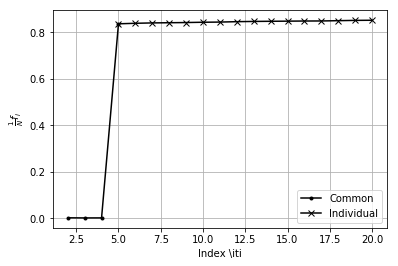

In [3]:
demo_LinkedBSS(
    filename='Speech4.mat', 
    dirname=_DIRNAME_DATA,
    mcRun=20, 
    c=4,
    N=10, 
    K=6, 
    Jn=50,
    noiseL=20,
    cobe_opts=None,
    cobec_opts=None,
    bss_opts=None
)

## P-COBE demo

### Warning:
    SIR's are very poor

 ==== Results ====
Reduced dims:        [ 100  200  300  400  500  600  700  800  900 1000]   / Total =  5000
Averaged SIRs (dB):  [ 26.71653674  27.45043768  27.62940197  27.68834778  27.72741349
  27.75374205  27.76431297  27.76840324  27.78816149  27.79121557]
Averaged Time  (s):  [ 0.2548597   0.7898129   1.0252906   1.2069919   1.33654105  1.4210616
  1.45124145  1.6162809   1.82198335  1.8063518 ]


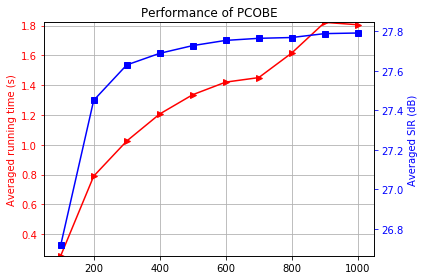

In [2]:
demo_pcobe(
    filename='Speech4.mat',
    dirname=_DIRNAME_DATA,
    mcRun=20,
    noiseL=20,
    N=10,
    c=4,
    K=6,
    Jn=50,
    pdimsMin=100,
    pdimsMax=1000,
    pdimsStep=100,
    verbose=False,
    datfname=None, #'demo_pcobe',
    imfname=None #'demo_pcobe.pdf'
)